In [5]:
import pandas as pd
df = pd.read_excel('Plant_Tree_data.xlsx')
print (df.describe())
print (df.head(5))

         LeafLength   LeafBreadth  ErrorLeafLength  ErrorLeafBreadth  \
count  17898.000000  17898.000000     17898.000000      17898.000000   
mean     111.079968     46.549532         0.477857          1.770279   
std       25.652935      6.843189         1.064040          6.167913   
min        5.812500     24.772042        -1.876011         -1.791886   
25%      100.929688     42.376018         0.027098         -0.188572   
50%      115.078125     46.947479         0.223240          0.198710   
75%      127.085938     51.023202         0.473325          0.927783   
max      192.617188     98.778911         8.069522         68.101622   

       LeafCurveAngle  EdgeCurvatureAngle  ErrorLeafCurvature    TreeLength  \
count    17898.000000        17898.000000        17898.000000  17898.000000   
mean        12.614400           26.326515            8.303556    104.857709   
std         29.472897           19.470572            4.506092    106.514540   
min          0.213211            7.

In [6]:
print('TreeType', df['TreeType'].unique())

TreeType [0 1]


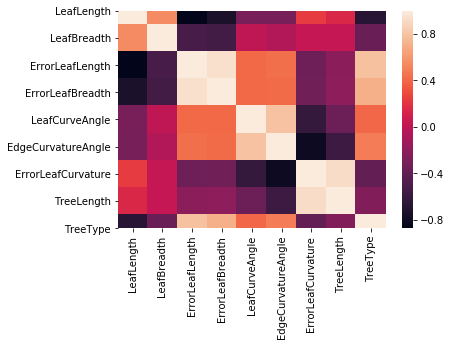

In [8]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)

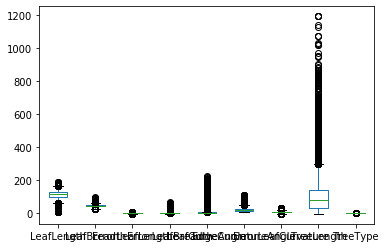

In [9]:
#outlier anaylsis
ax = df.plot.box()

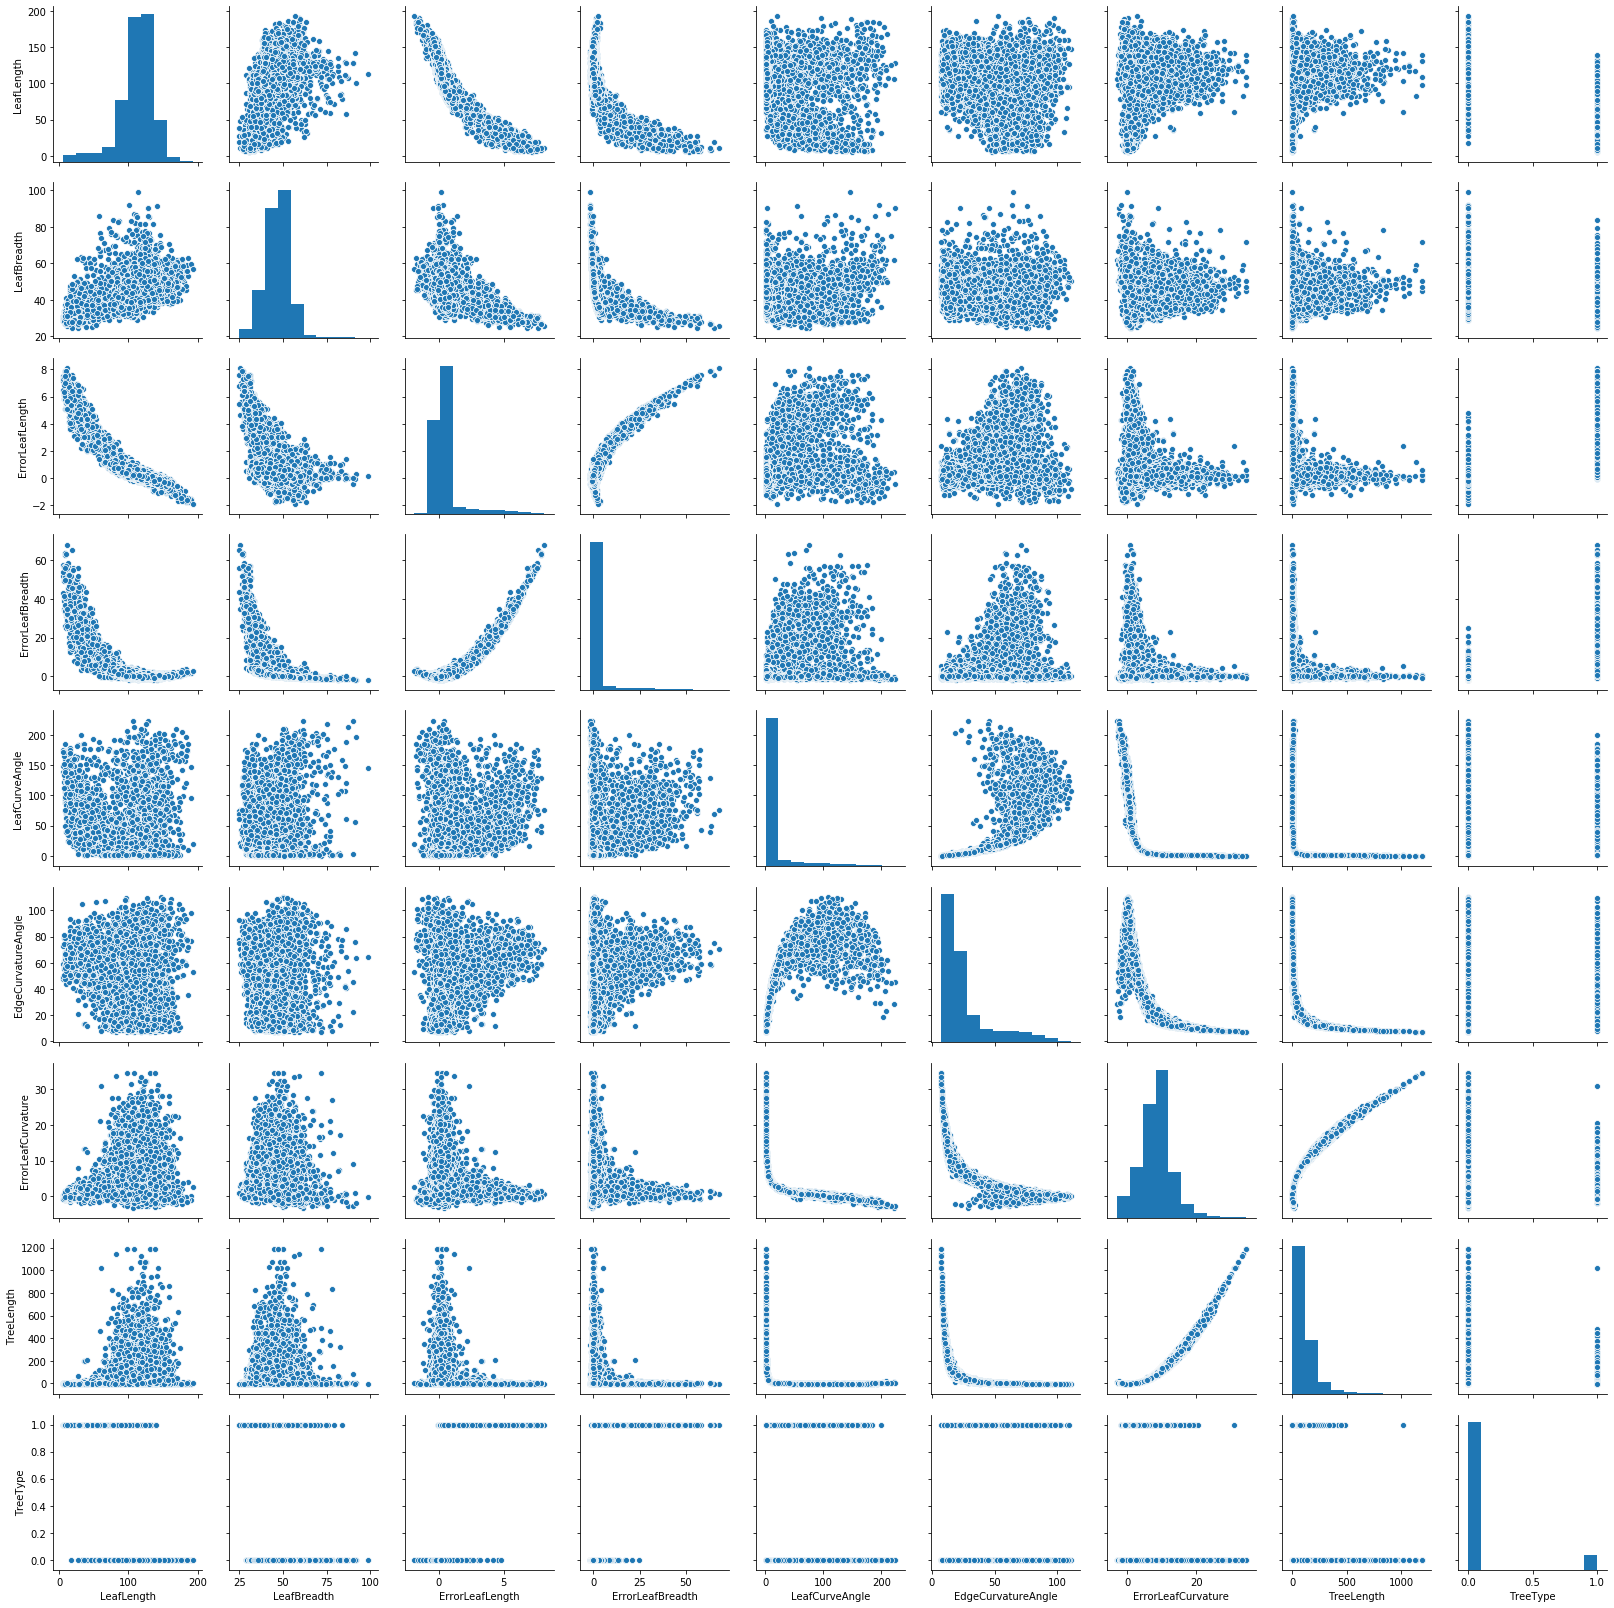

In [10]:
import seaborn as sns
sns.pairplot(df)

(17898, 9)


/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/p

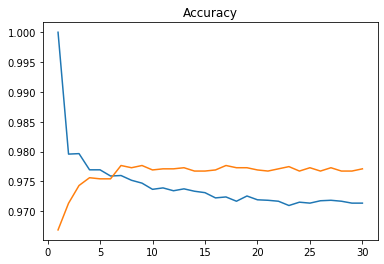

In [46]:
import numpy as np

# classification needs scaled data and this can be used 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)



y = df[['TreeType']]
X = df.drop(['TreeType'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=42,stratify = y)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

test_score = np.ones(30)
train_score = np.ones(30)

for i in range (1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train )
    pred_test = knn.predict(X_test)
    pred_train  = knn.predict(X_train)
    train_score[i-1] = accuracy_score(pred_train, y_train)
    test_score[i-1] = accuracy_score(pred_test, y_test)
 


import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.plot(range(1,31),train_score,label = 'training scores' )
plt.plot(range(1,31),test_score,label = 'testing scores' )
plt.legend
plt.show()




In [47]:
# running for n = 9

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train )
pred_test  = knn.predict(X_test)
test_score = accuracy_score(pred_test, y_test)

from sklearn.metrics import classification_report

print (classification_report(y_test, pred_test))

/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4878
           1       0.95      0.80      0.87       492

    accuracy                           0.98      5370
   macro avg       0.96      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370



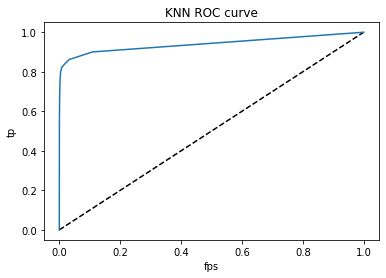

0.9406262812628127

In [48]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve

fps,tp,threshold = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fps,tp,label='KNN')
plt.xlabel('fps')
plt.ylabel('tp')
plt.title('KNN ROC curve')
plt.show()


from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

In [53]:
#using Grid search for tuning hyperparameters

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,30)}
knn= KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print(knn_cv.best_score_)
print(knn_cv.best_params_)



/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-p

/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-p

/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-p

/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-p

/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-p

/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-p

accuracy =  0.9729020002234886
{'n_neighbors': 12}


/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [51]:
# paramaters tuning gives best n = 12

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))



/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.98
